In [12]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [2]:
df = pd.read_csv("Data/CO2 Emissions_Canada.csv")
df = df.dropna()

C:\Users\Kan\AppData\Local\Temp\ipykernel_3208\4237245582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


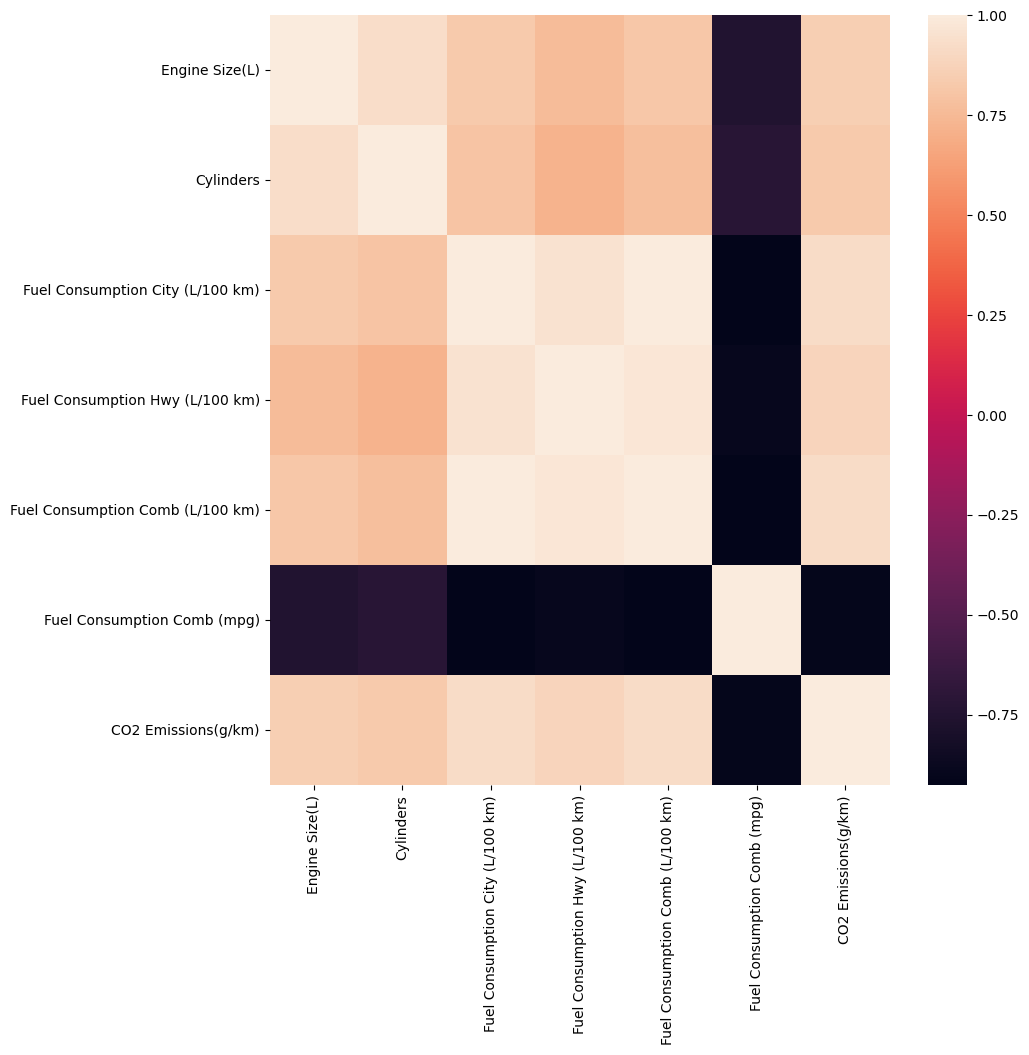

In [3]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [4]:
test_size = 0.2
df = df.drop(columns={"Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"})
data_x = df.drop(columns={"CO2 Emissions(g/km)"})
data_y = df[["CO2 Emissions(g/km)"]]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=42)

In [6]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

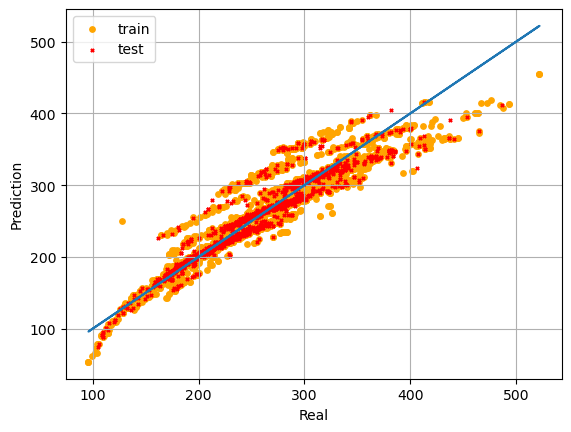

In [8]:
plt.scatter(y_train, y_pred_train , color="orange", marker = "o", s = 15, label="train")
plt.scatter(y_test, y_pred_test ,   color="red", marker = "x", s = 5, label="test")
plt.plot(data_y, data_y, "-")
# putting labels
plt.xlabel('Real')
plt.ylabel('Prediction')
# function to show plot
plt.grid()
plt.legend()
plt.show()

In [11]:


y_pred_test = reg.predict(x_test)            # Predict
Error = MAPE(y_test, y_pred_test)          # Check Performance
Error*100

4.460825177803255